#### **Optimizing Inventory and Sales Strategies in the Video Game Industry**
In this project, we aim to help developers, publishers, and distributors optimize their sales strategy, increase customer reach, and boost revenue.

Using Python for data analysis and visualization, this project will:
- Explore historical sales data to identify trends and patterns.
- Develop actionable strategies to improve inventory performance and boost sales.

---
### **Part One: Setup**

In [1]:
# Import libraries

import os
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

import analysis
import sql_queries
from clean import process_dataframe

In [2]:
# Step 1: Load the datasets and convert to them to DataFrames
sales = './vgsales.csv'
metadata = './games.csv'

def read_csv_file(file_path):

    if not os.path.exists(file_path):
        print(f"File '{file_path}' does not exist.")
        return None
    
    df = pd.read_csv(file_path)
    return df

df_sales = read_csv_file(sales)
df_metadata = read_csv_file(metadata)

In [3]:
# Step 2: Clean the data
df_sales = process_dataframe(df_sales)
df_metadata = process_dataframe(df_metadata)

In [4]:
# Step 3: Create SQL database
db = 'videogames.db'
conn = sqlite3.connect(db)

# Add tables to the database
df_sales.to_sql('sales', conn, if_exists='replace', index=False)
df_metadata.to_sql('metadata', conn, if_exists='replace', index=False)

conn.close()

---
### **Part Two: SQL Analysis**
We begin our analysis by gathering insights from various SQL qeuries.

In [5]:
# Connect to the database
def connect_to_db(db):

    if not os.path.exists(db):
        print(f"Database '{db}' does not exist.")
        return None
        
    return sqlite3.connect(db)

conn = connect_to_db('videogames.db')
cursor = conn.cursor()

**SQL Query #1:** What is the relationship between total games released and total sales by publisher?

In [6]:
# Let's compare the relationship between total games released and total sales by publisher
rows = sql_queries.games_to_sales_ratio(cursor)
g_to_s_ratio = pd.DataFrame(rows, columns=['Publisher', 'Game Count', 'Total Sales'])
g_to_s_ratio

,Publisher,Game Count,Total Sales
0,Nintendo,710,2122.30
1,Electronic Arts,1345,1129.98
2,Activision,965,785.81
3,Sony Computer Entertainment,682,607.28
4,Take-Two Interactive,412,552.30
5,Ubisoft,917,473.53
6,THQ,712,340.44
7,Namco Bandai Games,933,333.82
8,Mojang,6,279.02
9,Konami Digital Entertainment,823,278.56


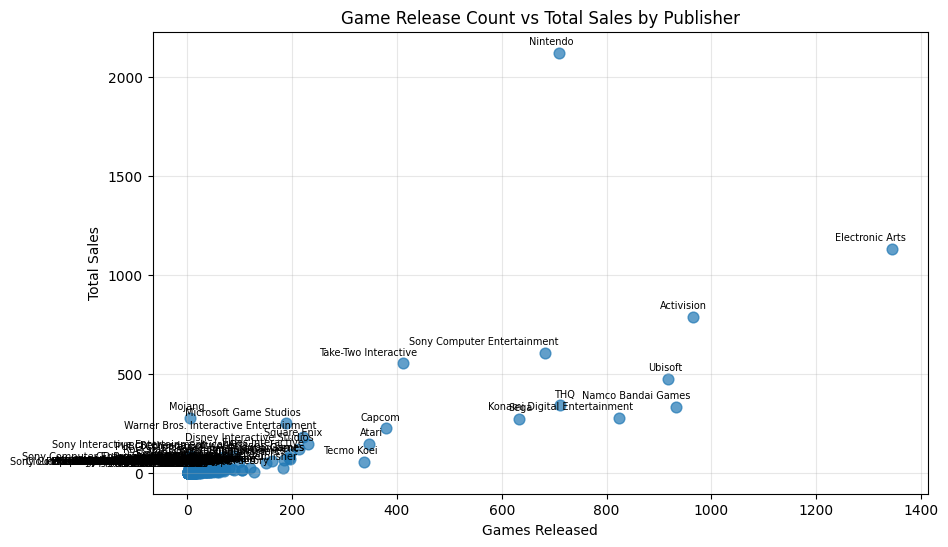

In [7]:
# A scatter chart can best visualize this relationship.

publisher_stats = df_sales.groupby('publisher').agg(
    game_count=('title', 'count'),
    total_sales=('global_sales', 'sum')
).reset_index()

analysis.publisher_scatter_plot(publisher_stats)


Like most entertainment industries, quality is more important than quantity. This is not to say that quantity doesn't matter. Look at Electronic Arts, with over 1,300 unqiue games, their sales are 2nd highest, but statistically compared to other publishers, their sales should be much higher. For example, Nintendo has almost half as many games as Electronic Arts, but double the sales. Most publishers have a predictable game count to sales ratio, but of course, there are outliers. When publishers consistently produce quality, influential games, quantity has less of an effect on total sales. Based on this data, game distributors should acknowledge that every new Nintendo game needs high stock levels, while most new EA games won't require as much stock.

##### **SQL Query #2:** What can we infer from a game's wishlist count?

Gamers often mark, or "wishlist", games as something they want to purchase in the future. If a game accumulates a large number of wishlists, it implies that there is a strong interest in that game. 

Despite a large wishlist count, a game can still have low sales. Low sales indicate that these games are either:
- Not readily available in the market (potential stock issue).
- Not priced competitively or marketed effectively.
- Experiencing delays in customer purchasing behavior (e.g., waiting for sales or bundles).

Low sales on high-wishlist games is an unmet demand that distributors should capitalize on. 

In [8]:
# Let's find out which games have high wishlist counts but low sales
rows = sql_queries.wishlist_analysis(cursor)
wishlist_analysis = pd.DataFrame(rows, columns=['Title', 'Wishlist Count', 'Total Sales'])
wishlist_analysis

,Title,Wishlist Count,Total Sales
0,Elden Ring,4800,25.53
1,Hades,3600,0.99
2,Stray,3400,5.91
3,Bloodborne,3300,2.38
4,Kirby and the Forgotten Land,3100,7.52
5,Cyberpunk 2077,2900,26.01
6,Red Dead Redemption 2,2900,61.56
7,God of War,2600,4.45
8,Cuphead,2600,8.78
9,The Legend of Zelda: Breath of the Wild,2600,32.39


Distributors should focus on stocking games on this list in higher volumes, or applying discounts to them, in order to make them more attainable for customers. Our findings corroborate with real-world examples. Elden Ring is currently on sale in multiple stores due to its high price point on Steam, but sustained popularity.

##### **SQL Query #3:** Which genres are popular?
Different players gravitate toward specific genres based on their preferences, gaming habits, and even emotional needs. In the next few queries, we will identify a pattern of how genres become popular. Based on this pattern, publishers may choose to release genre-trendy games, or distributors will increase genre-specific stock.

In [9]:
# First, let's calculate the total global sales for each genre.
rows = sql_queries.sales_by_genre(cursor)
sales_by_genre = pd.DataFrame(rows, columns=['Genre', 'Total Sales'])
sales_by_genre

,Genre,Total Sales
0,Action,1908.71
1,Sports,1335.70
2,Role-Playing,1243.00
3,Shooter,1213.92
4,Platform,895.51
5,Racing,791.02
6,Misc,766.14
7,Fighting,479.19
8,Simulation,465.53
9,Sandbox,359.78


Now let's join sales data with metadata to get additional insights such as average rating and number of reviews per genre. Why do these genres have such high sales?

In [10]:
rows = sql_queries.genre_comparisons(cursor)
genre_comparisons = pd.DataFrame(rows, columns=['Genre', 'Total Sales', 'Average Rating', 'Number of Reviews'])
genre_comparisons

,Genre,Total Sales,Average Rating,Number of Reviews
0,Action,1908.71,3.63,35344
1,Sports,1335.70,3.59,2511
2,Role-Playing,1243.00,3.86,29894
3,Shooter,1213.92,3.55,25064
4,Platform,895.51,3.63,27627
5,Racing,791.02,3.58,5643
6,Misc,766.14,3.57,2640
7,Fighting,479.19,3.38,5292
8,Simulation,465.53,3.55,3682
9,Sandbox,359.78,4.15,3


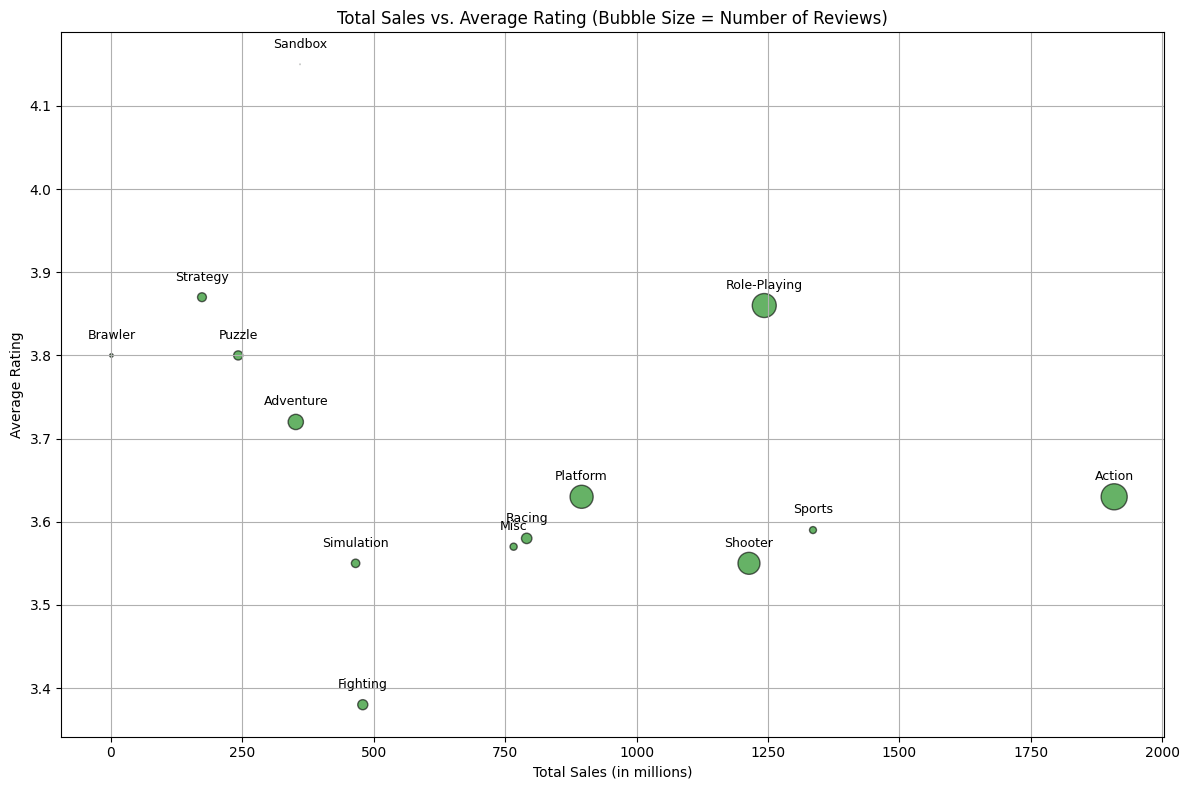

In [11]:
# This relationship can better be represented with a bar chart
analysis.genre_bubble_chart(genre_comparisons)

Note the high sales-to-reviews ratio for genres like Action, Sports, and Role-Playing. These genres generate a lot of sales without necessarily receiving a high number of reviews. This can indicate a high volume of sales from casual players who may not leave reviews as often. If a publisher wants to push out a low-stakes game, they can consider a genre like Sports, a genre that's not as heavily scrutinized as say, RPG games.

The Sandbox genre stands out due to its very high rating (4.15) despite having little reviews. There are not many Sandbox games on the market (in part due to their difficulty to develop), but the few that are are quite successful (e.g. Minecraft, Terraria, No Man's Sky). The Sandbox genre could represent a niche with strong potential. It would be a good investment for developers to take on a Sandbox game.

Genres like Racing, Platform, and Simulation have moderate sales and ratings, indicating steady performance but not necessarily standout results in either category. These might represent genres that are stable but could benefit from innovation or a more engaged community. Platform is a difficult genre to innovate, however, because it has hit the ceiling in terms of creativity. Publishers need to be extremely creative if deciding to push out a Platform game. 

To finalize this query, let's make the data more digestable for video game distributers and publishers by generating a correlation between sales and reviews.

In [12]:
rows = sql_queries.genre_correlation(cursor)
genre_correlation = pd.DataFrame(rows, columns=['Genre', 'Sales per Review Correlation'])
genre_correlation

,Genre,Sales per Review Correlation
0,Action,0.054
1,Sports,0.532
2,Role-Playing,0.042
3,Shooter,0.048
4,Platform,0.032
5,Racing,0.140


By analyzing each genre's sales and reviews as a correlation, publishers and distributors can make more confident decisions.
- High, positive correlation (close to 1): The two metrics are closely related. More sales mean more reviews. If a game sells 100 copies, it gets 10 reviews; if it sells 200 copies, it gets 20 reviews. Both increase together.
- Low or no correlation (close to 0): The two metrics are not related. If a game has 100 sales but a 5-star rating, and another game has 1000 sales but a 2-star rating, there’s no clear link between ratings and sales.
- Negative correlation (close to -1): If more reviews actually lead to lower sales (which is rare), that’s a negative correlation.

---
### **Part 3: In-Depth Genre Analysis**

We will highlight the importance of genres in the video game market by continuing our genre analyis through DataFrame manipulation and predictive modeling.